## Stock Market Analysis

#### Overview:

Stock Market Performance Analysis involves evaluating the performance of stocks and the overall stock market to make informed investment decisions.

When it comes to data analysis, Stock Market Performance Analysis involves the use of various data-driven techniques and tools to examine and interpret stock market data.
This time, we will be mainly calculating <b> moving averages, measuring volatility, conducting correlation analysis </b> and analyzing various aspects of the stock market to gain a deeper understanding of the factors that affect stock prices and the relationships between the stock prices of different companies.

We will use the <b> Yahoo finance API (yfinance) </b> to collect real-time stock market data for the past three months.

In [51]:
#import libraries
import pandas as pd
import yfinance as yf
import datetime
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [27]:
#import library to avoid warnings
import warnings
warnings.filterwarnings('ignore')

### 1. Retrieving data from Yfinance API

#### Toyota Motor Corporation (7203.T)

#### Honda Motor Co., Ltd. (7267.T)

#### Subaru Corporation (7270.T)

#### Suzuki Motor Corporation (7269.T)

In [28]:
#Stock Code values for TOKYO STOCK EXCHANGE
#stock_code = ["7203.T","7267.T","7270.T","7269.T"]
stock_code = {"7203.T":"TOYOTA","7267.T":"HONDA","7270.T":"SUBARU","7269.T":"SUZUKI"}
df_list = []

We will be appending stock data for previous 3months into a list

In [29]:
#Fetch the data from YFinance API
for ticker in stock_code:
    data = yf.download(tickers=ticker,period="3mo")
    df_list.append(data)

df_list

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[              Open    High     Low   Close  Adj Close    Volume
 Date                                                           
 2024-05-07  3650.0  3650.0  3562.0  3599.0     3599.0  25496600
 2024-05-08  3547.0  3674.0  3453.0  3579.0     3579.0  68295000
 2024-05-09  3595.0  3595.0  3473.0  3528.0     3528.0  40742400
 2024-05-10  3504.0  3540.0  3386.0  3425.0     3425.0  50941700
 2024-05-13  3417.0  3434.0  3351.0  3366.0     3366.0  30544300
 ...            ...     ...     ...     ...        ...       ...
 2024-07-31  2929.0  2962.0  2870.5  2949.0     2949.0  46261100
 2024-08-01  2901.0  2912.0  2698.0  2699.0     2699.0  80069400
 2024-08-02  2576.0  2652.0  2538.0  2585.0     2585.0  69193000
 2024-08-05  2450.0  2461.0  2183.0  2232.0     2232.0  83087200
 2024-08-06  2532.0  2551.5  2405.0  2518.0     2518.0  68201400
 
 [65 rows x 6 columns],
               Open    High     Low   Close  Adj Close    Volume
 Date                                                           

Since the list contains data for each stock in a linear order, we will be using pandas concat method to create a dataframe from it.

We will also reset the index of the dataframe.

In [30]:
#Concat the data and reset the index since it is a multi-level index
stock_df = pd.concat(df_list,keys=stock_code.keys(),names=["Ticker"])
stock_df = stock_df.reset_index()
stock_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,7203.T,2024-05-07,3650.0,3650.0,3562.0,3599.0,3599.0,25496600
1,7203.T,2024-05-08,3547.0,3674.0,3453.0,3579.0,3579.0,68295000
2,7203.T,2024-05-09,3595.0,3595.0,3473.0,3528.0,3528.0,40742400
3,7203.T,2024-05-10,3504.0,3540.0,3386.0,3425.0,3425.0,50941700
4,7203.T,2024-05-13,3417.0,3434.0,3351.0,3366.0,3366.0,30544300


In [31]:
#general info of the dataframe
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Ticker     260 non-null    object        
 1   Date       260 non-null    datetime64[ns]
 2   Open       260 non-null    float64       
 3   High       260 non-null    float64       
 4   Low        260 non-null    float64       
 5   Close      260 non-null    float64       
 6   Adj Close  260 non-null    float64       
 7   Volume     260 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 16.4+ KB


In [32]:
#size of the dataframe
stock_df.shape

(260, 8)

In [33]:
#to check if there are any null values
stock_df.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Since its hard & confusing to remember the company name using stock code, we will be replacing the stock codes with the respective company names

In [34]:
#replace the stock codes in the data frame with respective company name
stock_df.replace(to_replace=stock_code.keys(),value=stock_code.values(),inplace=True)
stock_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,TOYOTA,2024-05-07,3650.0,3650.0,3562.0,3599.0,3599.0,25496600
1,TOYOTA,2024-05-08,3547.0,3674.0,3453.0,3579.0,3579.0,68295000
2,TOYOTA,2024-05-09,3595.0,3595.0,3473.0,3528.0,3528.0,40742400
3,TOYOTA,2024-05-10,3504.0,3540.0,3386.0,3425.0,3425.0,50941700
4,TOYOTA,2024-05-13,3417.0,3434.0,3351.0,3366.0,3366.0,30544300


### 2. Performance in the stock market of all the companies

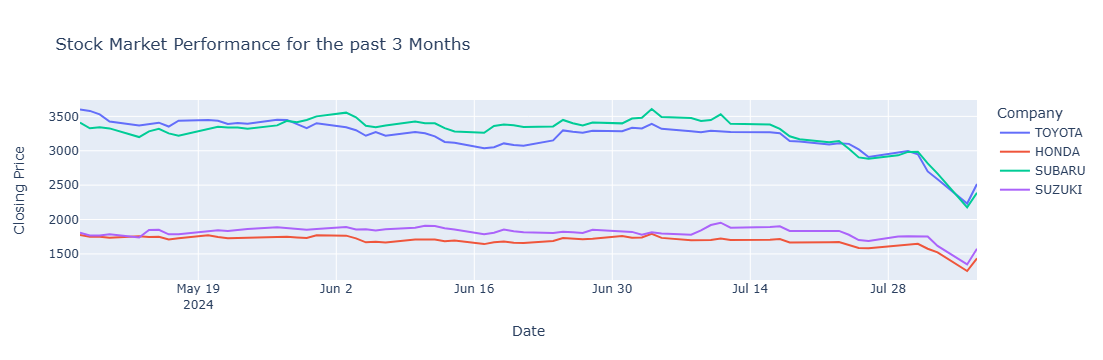

In [52]:
#Plot a line graph to display the performance of the companies
fig = px.line(data_frame=stock_df,x="Date",y="Close",color="Ticker",labels={"Ticker":"Company","Close":"Closing Price"},title="Stock Market Performance for the past 3 Months")
# fig.show()
iplot(fig)

In [36]:
#to check the unique company values
stock_df["Ticker"].unique()

array(['TOYOTA', 'HONDA', 'SUBARU', 'SUZUKI'], dtype=object)

#### From the above graph, we can conclude that Toyota & Subaru's close price are relatively close. 

#### Lets create a faceted area chart to compare the performance of different companies & identify similarities or differences in their stock price movements

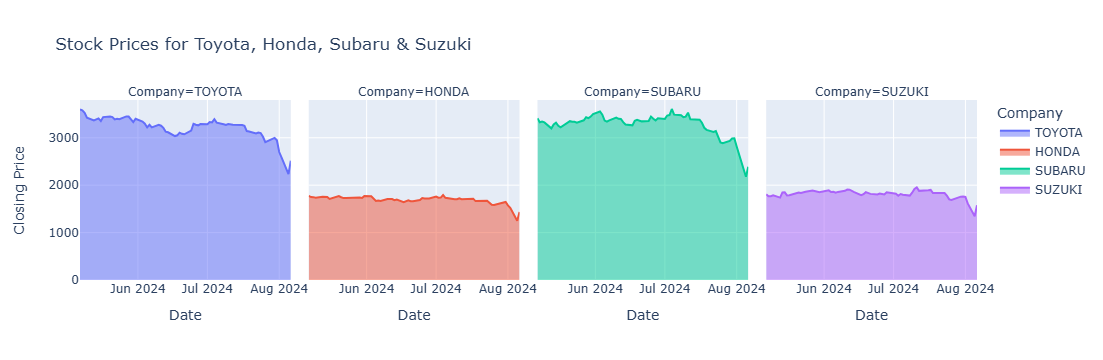

In [37]:
#plot a faceted area chart to compare all companies performance side by side
fig = px.area(data_frame=stock_df,x="Date",y="Close",color="Ticker",
        facet_col="Ticker",labels={"Close":"Closing Price","Ticker":"Company"},
        title="Stock Prices for Toyota, Honda, Subaru & Suzuki")

fig.show()

### 3. Analysing Moving Average

Simple Moving Average (SMA): The SMA is calculated by taking the average of a stock's price over a specific number of periods (e.g., 10 days or 20 days). It helps smooth out price data to identify trends over time.

Purpose: Moving averages help investors identify the direction of the trend, signal potential buy/sell points, and provide support/resistance levels.

In [38]:
#to analyse moving average, declare 2 moving average values
ma_num = [10,20]

#calculate moving average mean for the entire dataframe
for num in ma_num:
    stock_df["MA_"+str(num)] = stock_df.groupby("Ticker")["Close"].rolling(window=num).mean().reset_index(level=0,drop=True)

In [39]:
#print(stock_df.groupby("Ticker")["Close"].rolling(window=10).mean())

To achieve the Moving average for 10 and 20 days, we will be using pandas rolling function with the window values (10 & 20) to find the mean.

Since the resulting data from rolling function would be 2 level index, we need to reset the index to fit it into a dataframe

In [40]:
stock_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20
0,TOYOTA,2024-05-07,3650.0,3650.0,3562.0,3599.0,3599.0,25496600,NaN,NaN
1,TOYOTA,2024-05-08,3547.0,3674.0,3453.0,3579.0,3579.0,68295000,NaN,NaN
2,TOYOTA,2024-05-09,3595.0,3595.0,3473.0,3528.0,3528.0,40742400,NaN,NaN
3,TOYOTA,2024-05-10,3504.0,3540.0,3386.0,3425.0,3425.0,50941700,NaN,NaN
4,TOYOTA,2024-05-13,3417.0,3434.0,3351.0,3366.0,3366.0,30544300,NaN,NaN


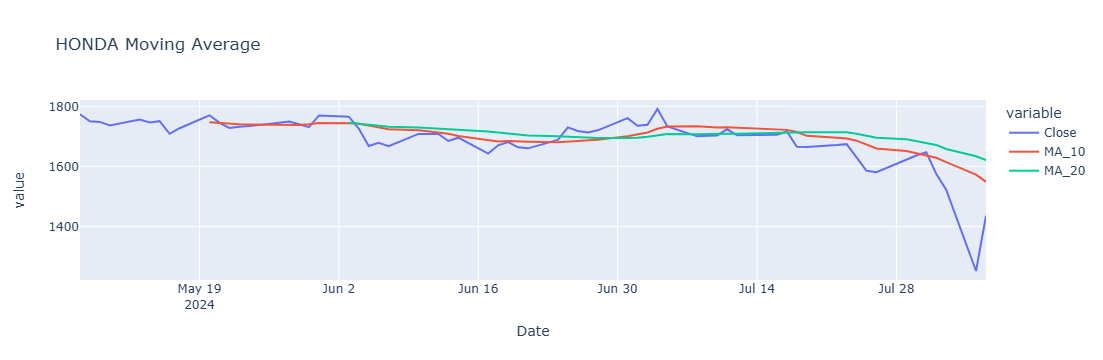

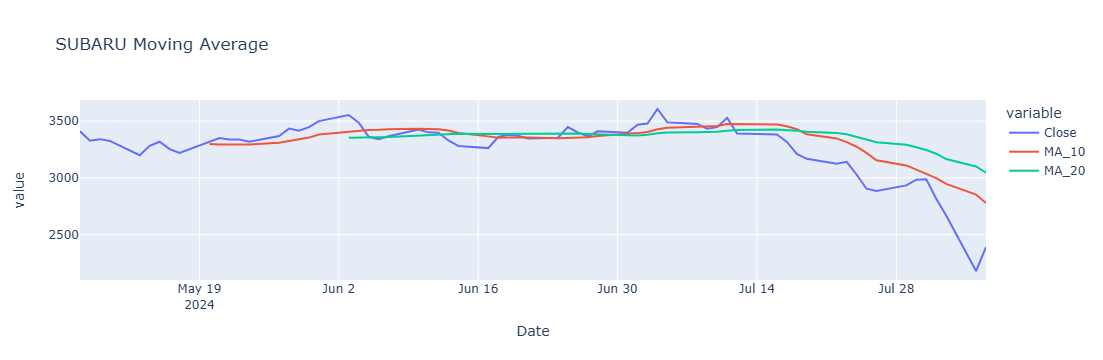

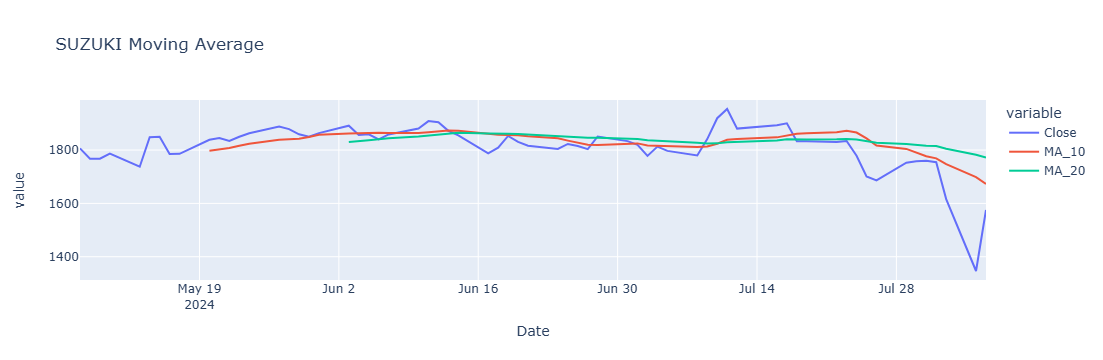

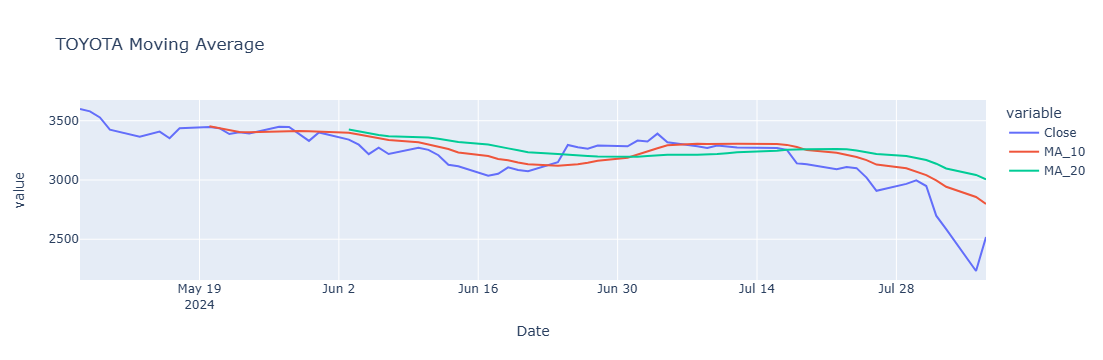

In [41]:
#plot a line graph for the moving average 
for ticker, group in stock_df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA_10', 'MA_20'], 
                  title=f"{ticker} Moving Average")
    fig.show()

#### The output shows four separate graphs for each company. When the MA10 crosses above the MA20, it is considered a bullish signal indicating that the stock price will continue to rise. Conversely, when the MA10 crosses below the MA20, it is a bearish signal that the stock price will continue falling.

#### From the above graphs, we see the Moving average 10 is below moving average 20 for all 4 stocks which means the near-term stock prediction for these 4 companies would be bearish.

### 4. Analysing Volatility

Volatility is a measure of how much and how often the stock price or market fluctuates over a given period of time.

Standard Deviation: This measures the dispersion of stock prices from the mean. High standard deviation indicates high volatility.

Purpose: Understanding volatility helps investors assess risk, make better trading decisions, and optimize portfolio allocation.

In [42]:
stock_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20
0,TOYOTA,2024-05-07,3650.0,3650.0,3562.0,3599.0,3599.0,25496600,NaN,NaN
1,TOYOTA,2024-05-08,3547.0,3674.0,3453.0,3579.0,3579.0,68295000,NaN,NaN
2,TOYOTA,2024-05-09,3595.0,3595.0,3473.0,3528.0,3528.0,40742400,NaN,NaN
3,TOYOTA,2024-05-10,3504.0,3540.0,3386.0,3425.0,3425.0,50941700,NaN,NaN
4,TOYOTA,2024-05-13,3417.0,3434.0,3351.0,3366.0,3366.0,30544300,NaN,NaN


In [43]:
#print(stock_df.groupby("Ticker")["Close"].pct_change().rolling(window=10).std())

In [44]:
#this is to check volatility of stocks, we will be use\ing pct_change
stock_df["Volatility"] = stock_df.groupby("Ticker")["Close"].pct_change().rolling(window=10).std().reset_index(level=0,drop=True)

In [45]:
stock_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,Volatility
0,TOYOTA,2024-05-07,3650.0,3650.0,3562.0,3599.0,3599.0,25496600,NaN,NaN,NaN
1,TOYOTA,2024-05-08,3547.0,3674.0,3453.0,3579.0,3579.0,68295000,NaN,NaN,NaN
2,TOYOTA,2024-05-09,3595.0,3595.0,3473.0,3528.0,3528.0,40742400,NaN,NaN,NaN
3,TOYOTA,2024-05-10,3504.0,3540.0,3386.0,3425.0,3425.0,50941700,NaN,NaN,NaN
4,TOYOTA,2024-05-13,3417.0,3434.0,3351.0,3366.0,3366.0,30544300,NaN,NaN,NaN


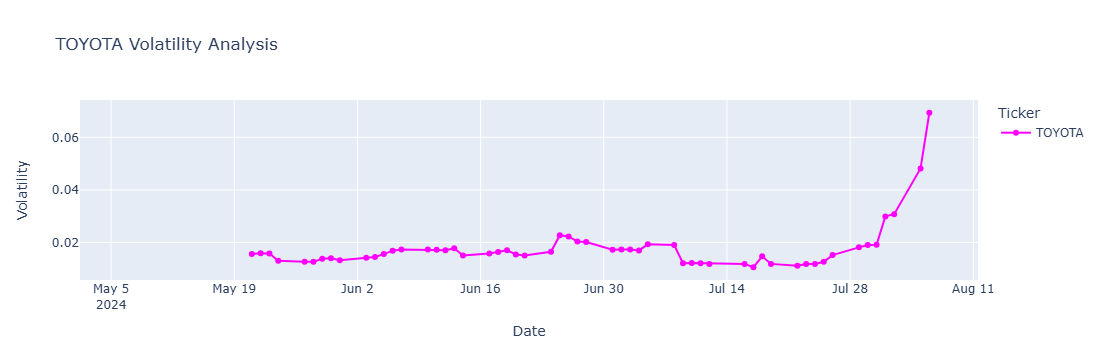

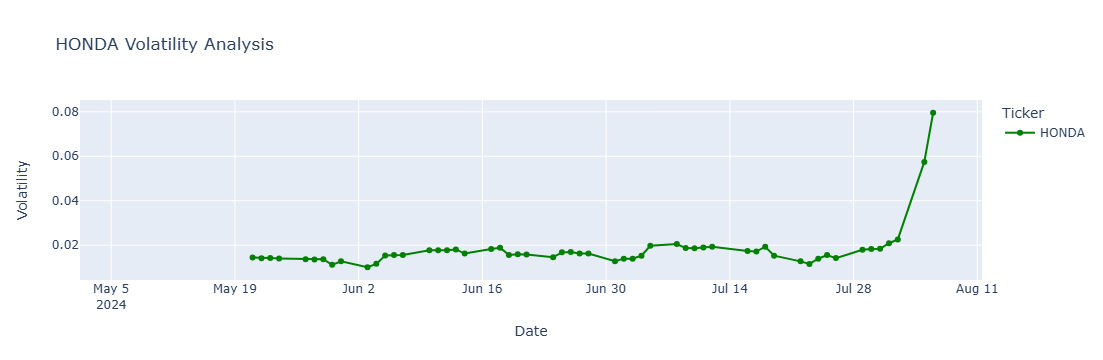

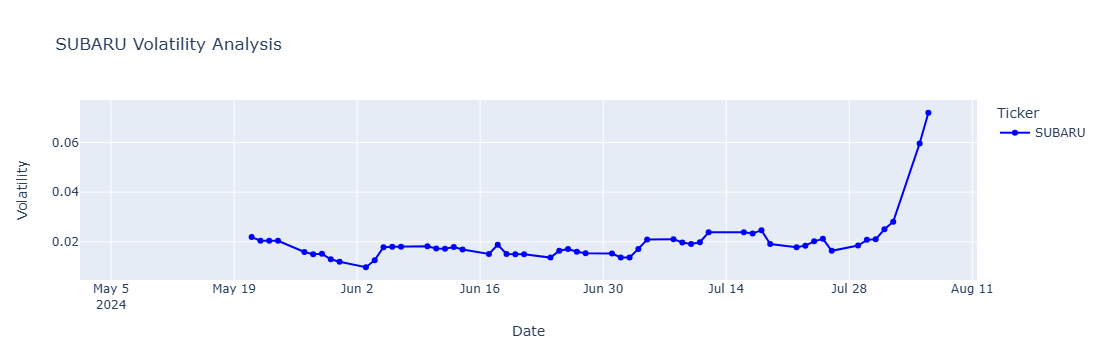

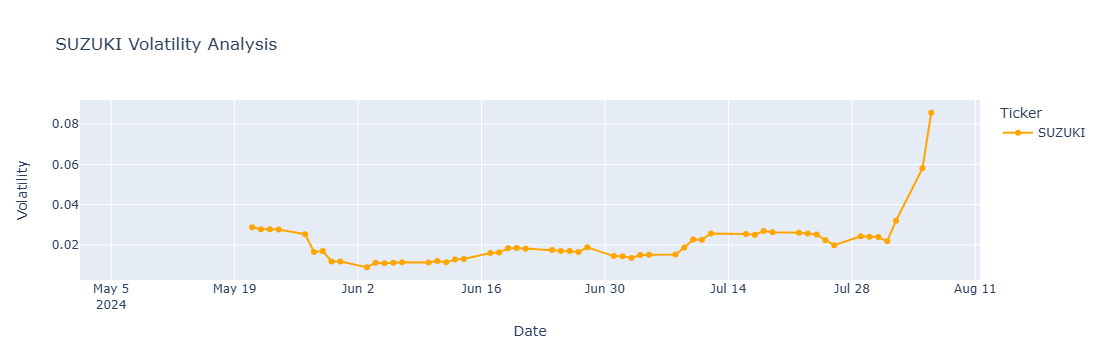

In [46]:
#manual assigning of colors to change for each graph
colors=["Magenta","Green","Blue","Orange"]
counter = 0
#plot line graph for volatility values
for cols in stock_code.values():
    vol_df = stock_df[stock_df["Ticker"]==cols]
    fig = px.line(data_frame=vol_df,x="Date",y="Volatility",color="Ticker"
                 ,title=f"{cols} Volatility Analysis",markers=True,color_discrete_sequence=[colors[counter]])
    counter += 1

    fig.show()

High volatility indicates that the stock or market experiences large and frequent price movements, while low volatility indicates that the market experiences smaller or less frequent price movements.

#### From the above Volatility Analysis graphs, we see all 4 stocks are experiencing high volatility, which means above stocks would experience frequent price movements in the near future.

### 5. Correlation Analysis

Pearson Correlation Coefficient: This statistical measure shows the linear relationship between two stocks. Values range from -1 to 1, where 1 indicates perfect positive correlation, -1 indicates perfect negative correlation, and 0 indicates no correlation.

Purpose: Correlation analysis helps in understanding how different stocks move in relation to each other, aiding in risk management and portfolio optimization.

In [47]:
stock_df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,MA_10,MA_20,Volatility
0,TOYOTA,2024-05-07,3650.0,3650.0,3562.0,3599.0,3599.0,25496600,NaN,NaN,NaN
1,TOYOTA,2024-05-08,3547.0,3674.0,3453.0,3579.0,3579.0,68295000,NaN,NaN,NaN
2,TOYOTA,2024-05-09,3595.0,3595.0,3473.0,3528.0,3528.0,40742400,NaN,NaN,NaN
3,TOYOTA,2024-05-10,3504.0,3540.0,3386.0,3425.0,3425.0,50941700,NaN,NaN,NaN
4,TOYOTA,2024-05-13,3417.0,3434.0,3351.0,3366.0,3366.0,30544300,NaN,NaN,NaN


In [48]:
#create a empty dataframe for holding the close values of 4 companies
corr_df = pd.DataFrame()

#filtering the dataframe to contain only required data
for cols in stock_code.values():
    temp_df = pd.DataFrame()
    temp_df[str(cols)+"_Close"] = stock_df[stock_df["Ticker"]==cols]["Close"]
    temp_df = temp_df.reset_index(drop=True)
    corr_df = pd.concat([corr_df,temp_df],axis=1)

corr_df.head()

,TOYOTA_Close,HONDA_Close,SUBARU_Close,SUZUKI_Close
0,3599.0,1773.5,3410.0,1806.5
1,3579.0,1750.0,3327.0,1767.5
2,3528.0,1748.0,3341.0,1767.5
3,3425.0,1736.5,3325.0,1787.0
4,3366.0,1756.0,3199.0,1737.5


#### Default correlation method in Pandas is Pearson Correlation

In [49]:
#correlation calculation
corr_values = corr_df.corr()
corr_values

,TOYOTA_Close,HONDA_Close,SUBARU_Close,SUZUKI_Close
TOYOTA_Close,1.000000,0.940549,0.846429,0.707496
HONDA_Close,0.940549,1.000000,0.903111,0.810252
SUBARU_Close,0.846429,0.903111,1.000000,0.848627
SUZUKI_Close,0.707496,0.810252,0.848627,1.000000


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0, 0.5, 'TOYOTA_Close'),
  Text(0, 1.5, 'HONDA_Close'),
  Text(0, 2.5, 'SUBARU_Close'),
  Text(0, 3.5, 'SUZUKI_Close')])

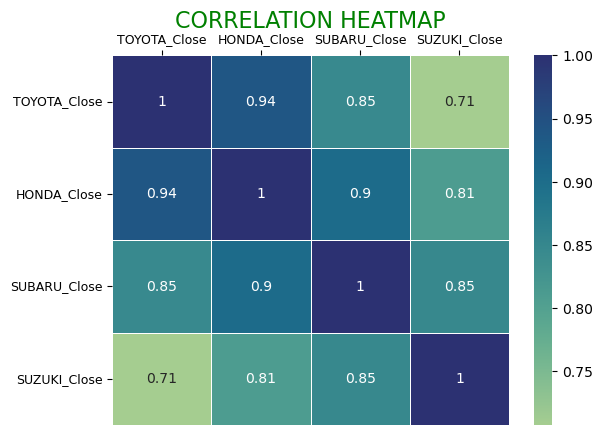

In [50]:
#plotting a correlation heatmap
color = sns.color_palette("crest", as_cmap=True)
ax = sns.heatmap(data=corr_values,annot=True,cmap=color,linewidths=.7)
ax.set(xlabel = "",ylabel="")
ax.xaxis.tick_top()
ax.set_title('CORRELATION HEATMAP', fontdict={'fontsize':16,"color":"Green"}, pad=20)
plt.xticks(fontsize=9,rotation=0)
plt.yticks(fontsize=9,rotation=0)


#### From the above Correlation Heatmap, we see there is direct correlation between (TOYOTA & HONDA) as well as (SUBARU & HONDA)
#### Which means when stock price of TOYOTA increases, HONDA stock prices will increase.
#### Similarly when HONDA stock price increase, SUBARU as well increases